# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import seaborn as sns
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
#посмотрим типы данных и кол-во ненулевых значений


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

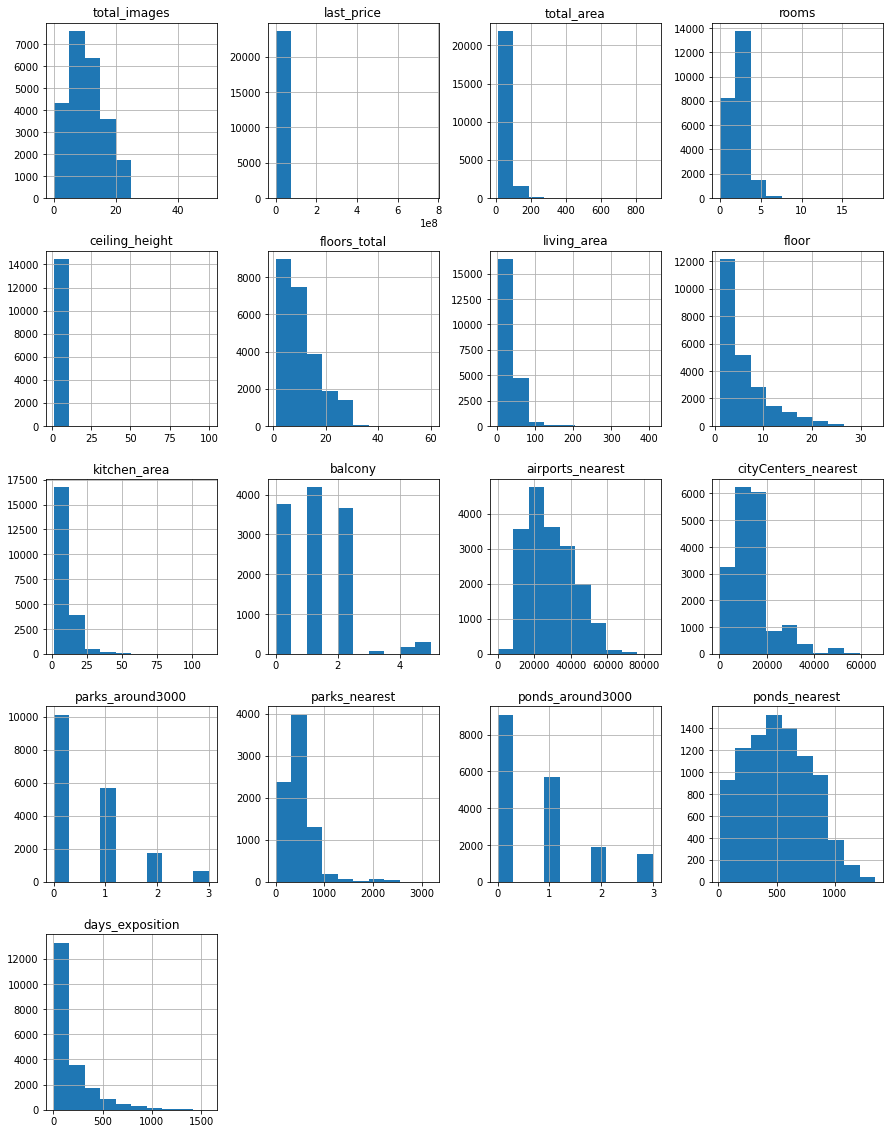

In [3]:
data.hist(figsize=(15, 20))

### Предобработка данных

In [4]:
print(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


In [5]:
data['total_images'].value_counts()
data['ceiling_height'].value_counts()
data['floor'].value_counts()
data['is_apartment'].value_counts()
data['total_area'].value_counts()
data['rooms'].value_counts()
data['airports_nearest'].value_counts()
data['cityCenters_nearest'].value_counts()
data['parks_around3000'].value_counts()
data['parks_nearest'].value_counts()
data['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

In [6]:
#заменим пропуски в days_exposition и заменим тип данных
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

In [7]:
#пропущенные значения в locality_name не будем трогать, причина не понятна
data['locality_name'].value_counts()


Санкт-Петербург                                            15721
посёлок Мурино                                               522
посёлок Шушары                                               440
Всеволожск                                                   398
Пушкин                                                       369
                                                           ...  
посёлок Шугозеро                                               1
поселок Красносельское                                         1
садоводческое некоммерческое товарищество Лесная Поляна        1
деревня Старое Хинколово                                       1
поселок Почап                                                  1
Name: locality_name, Length: 364, dtype: int64

In [8]:
#переведем столбец с датой в формат даты без времени, т.к. время не указано
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [9]:
#заменим пропуски в balcony на 0 и изменим тип данных на int
data['balcony'].value_counts()
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18545,6,3750000.0,43.0,2019-03-18,2,25.0,5.0,29.0,3,False,...,NaN,0,Санкт-Петербург,27054.0,8033.0,1.0,540.0,0.0,NaN,12
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,NaN,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5.0,31.3,5,NaN,...,5.7,0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,0
14382,9,1700000.0,35.0,2015-12-04,1,25.0,5.0,20.0,2,False,...,8.0,1,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,206
11285,0,1950000.0,37.0,2019-03-20,1,25.0,5.0,17.0,4,False,...,9.0,2,Луга,NaN,NaN,NaN,NaN,NaN,NaN,18
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,NaN,...,7.0,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5.0,30.0,2,NaN,...,5.2,0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,0
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,NaN,...,7.0,2,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,NaN,...,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,NaN,...,9.0,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540


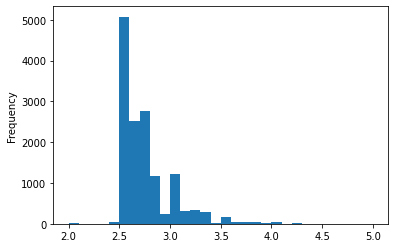

In [10]:
#посмотрим параметр ceiling_height, видим что есть необоснованно большие значения но пока оставим их как есть,
#медиана от среднего отличается не сильно из-за этих выбросов во всей выборке
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5))
data['ceiling_height'].value_counts()
data['ceiling_height'].describe()
data[data['ceiling_height'] > 4].sort_values('ceiling_height').tail(20)

In [11]:
#столбец апартаменты видимо появился не вместе с началом ведения записей, все пропущенные значения заменим на False, 
#апартаменты появились относительно недавно
data['is_apartment'] = data['is_apartment'].fillna(False)


In [12]:
#изменим цену на тип int для удобства просмотра
data['last_price'] = data['last_price'].astype('int')
data['last_price']

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

In [13]:
#посмотрим данные с пропущенными значениями в floors_total- ничего общего между ними нет, оставим как есть
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000,65.2,2018-10-02,2,NaN,NaN,30.80,4,False,...,12.00,0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49
237,4,2438033,28.1,2016-11-23,1,NaN,NaN,20.75,1,False,...,NaN,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251
457,4,9788348,70.8,2015-08-01,2,NaN,NaN,38.40,12,False,...,10.63,0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727
671,4,6051191,93.6,2017-04-06,3,NaN,NaN,47.10,8,False,...,16.80,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123
1757,5,3600000,39.0,2017-04-22,1,NaN,NaN,NaN,9,False,...,NaN,0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,63.5,2017-05-24,2,2.8,NaN,NaN,3,False,...,NaN,0,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512
22656,4,4574160,64.5,2017-04-02,2,NaN,NaN,31.70,20,False,...,14.40,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127
22808,0,14569263,110.4,2016-11-20,3,NaN,NaN,45.38,6,False,...,23.42,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260
23590,0,21187872,123.3,2017-04-25,3,NaN,NaN,50.40,18,False,...,23.60,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104


In [14]:
#living_area слишком много знаков после запятой и есть пропущенные значения, 
#можно посчитать средний процент жилой площади от всей площади по всей выборке
#и высчитать для строк с пропусками жилую площадь как вариант но мы не будем тратить на это время
data['living_area'].value_counts()
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [15]:
print(data['first_day_exposition'].describe())

count                   23699
unique                   1491
top       2018-02-01 00:00:00
freq                      368
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object


/tmp/ipykernel_91/188852043.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(data['first_day_exposition'].describe())


In [16]:
data.duplicated().sum() # явные дубликаты отсутствуют

0

In [17]:
#поиск неявных дубликатов
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [18]:
data['locality_name'] = data['locality_name'].replace('поселок городского типа Рябово', 'поселок Рябово')
data['locality_name'] = data['locality_name'].replace('поселок Тельмана', 'посёлок Тельмана')

In [19]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

### Посчитайте и добавьте в таблицу новые столбцы

In [20]:
#посчитаем цену квадратного метра
data['price_per_square_meter'] = data['last_price'] / data['total_area']

In [21]:
#для удобства просмотра приведем к типу int
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')

In [22]:
#создаю столбец дня недели
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

In [23]:
#создаю столбец месяца
data['month_exposition'] = data['first_day_exposition'].dt.month

In [24]:
#создаю столбец года
data['year_exposition'] = data['first_day_exposition'].dt.year

In [25]:
#напишем функцию категоризации по этажам, используя метод apply применимо к каждой строке датафрейма через axis = 1
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

In [26]:
#категоризуем этажи с помощью функции  
data['floor_category'] = data.apply(floor_category, axis = 1)

In [27]:
#добавим столбец соотношения жилой плозади к общей
data['useful_area_ratio'] = data['living_area'] / data['total_area']

In [28]:
#добавим столбец отношения площади кухни к общей
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

### Проведите исследовательский анализ данных

In [29]:
#изучим общую площадь
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,0,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,81,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,574.0,558,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,3.0,234.0,424,408176,4,7,2015,другой,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121,100000,1,6,2018,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,3.0,381.0,0,72490,1,3,2017,другой,0.547792,0.103356
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,NaN,NaN,45,52542,0,1,2018,другой,0.644068,0.144068
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,NaN,0,44091,6,2,2018,первый,0.523810,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,3.0,196.0,602,149511,1,3,2017,другой,NaN,0.303583


count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

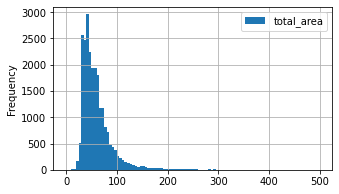

In [30]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
data['total_area'].describe()

распределение данных нормальное, есть выбросы но они не сильно влияют на данные, 
по гистограмме кроме распределения нечего больше указать, с помошью describe получил общее представление

изучим цену

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

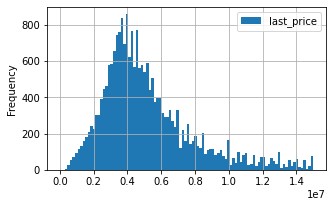

In [31]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))
data['last_price'].describe()

с данными все впорядке но значения выводятся в экспоненциальной записи чисел

In [32]:
#изучим число комнат
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,0,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,81,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,574.0,558,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,3.0,234.0,424,408176,4,7,2015,другой,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121,100000,1,6,2018,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,3.0,381.0,0,72490,1,3,2017,другой,0.547792,0.103356
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,NaN,NaN,45,52542,0,1,2018,другой,0.644068,0.144068
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,NaN,0,44091,6,2,2018,первый,0.523810,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,3.0,196.0,602,149511,1,3,2017,другой,NaN,0.303583


count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

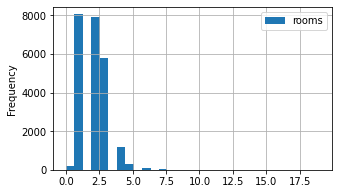

In [33]:
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
data['rooms'].describe()

count      23616
unique         3
top       другой
freq       17363
Name: floor_category, dtype: object

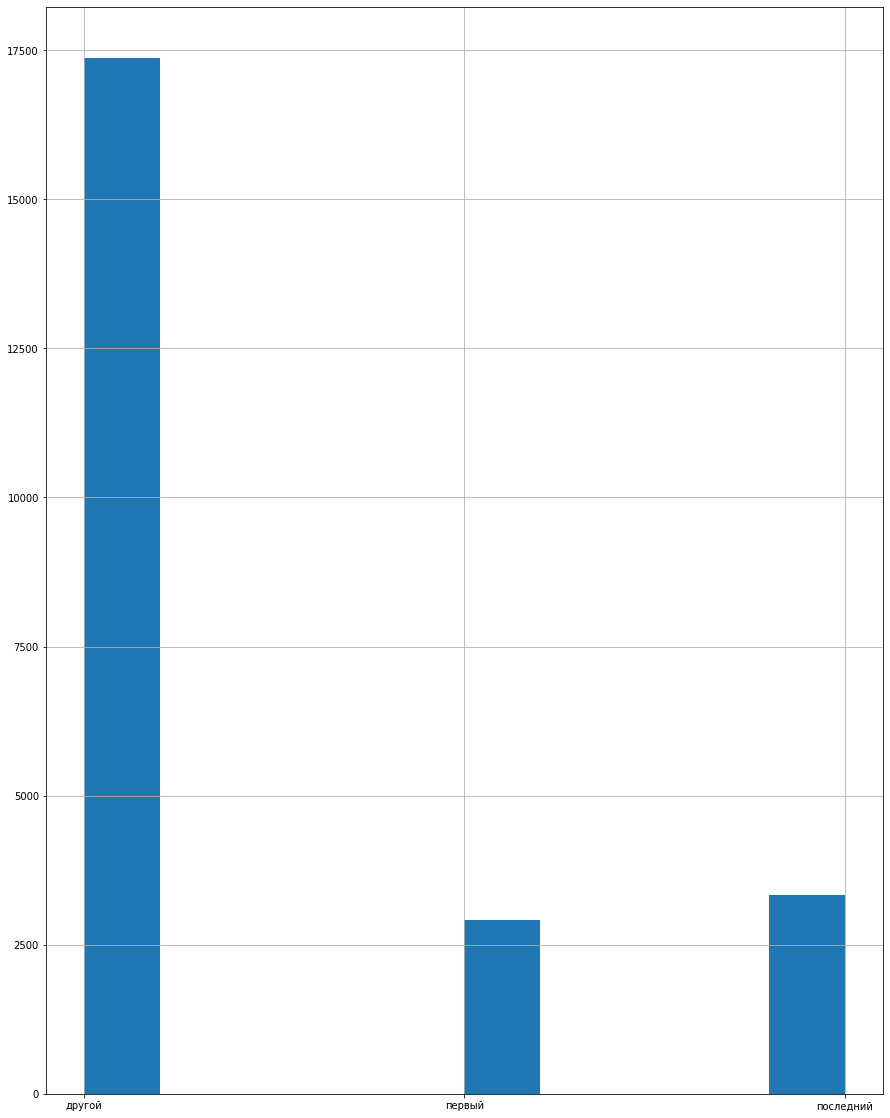

In [34]:
data['floor_category'].hist(figsize=(15, 20))
data['floor_category'].describe()
#с данными все впорядке

In [35]:
data['floor_category'].unique()

array(['другой', 'первый', 'последний', None], dtype=object)

с данными все впорядке

In [36]:
#изучим высоту потолков
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,0,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,81,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,574.0,558,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,3.0,234.0,424,408176,4,7,2015,другой,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121,100000,1,6,2018,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,3.0,381.0,0,72490,1,3,2017,другой,0.547792,0.103356
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,NaN,NaN,45,52542,0,1,2018,другой,0.644068,0.144068
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,NaN,0,44091,6,2,2018,первый,0.523810,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,3.0,196.0,602,149511,1,3,2017,другой,NaN,0.303583


count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

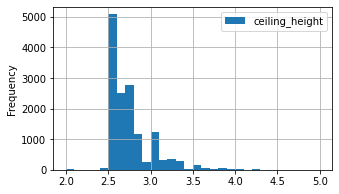

In [37]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (5,3))
data['ceiling_height'].describe()

с данными все впорядке

(1.0, 1000.0)

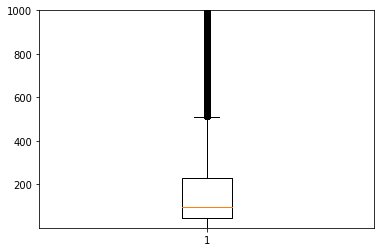

In [38]:
#диаграмма размаха
import matplotlib.pyplot as plt
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

<AxesSubplot:ylabel='Frequency'>

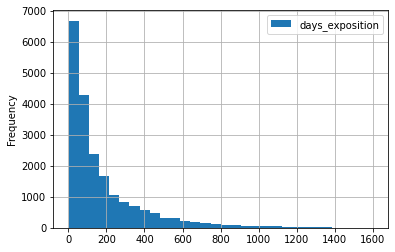

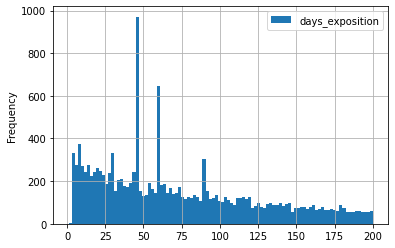

In [39]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

In [40]:
#среднее значение, медиана и межквартильный размах
data[data['days_exposition']!=0]['days_exposition'].describe()
#data[data['days_exposition']!=0]['days_exposition'].value_counts()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

судя по гистограмме - мы имеем распределение Пуассона. Среднее значение - 180 дней, а медиана - 95 дней. Сделав гистограмму 
со значениями от 0 до 200 с кол-вом корзин 100, обнаружили выбивающиеся значения и методом value_counts убедились 
в этом - у нас аномалии на 45, 60, 7, 30, 90 днях - это наиболее популярное количество дней до снятия объявления.

Изучим зависимость цены квадратного метра от общей площади квартиры.

<AxesSubplot:xlabel='total_area'>

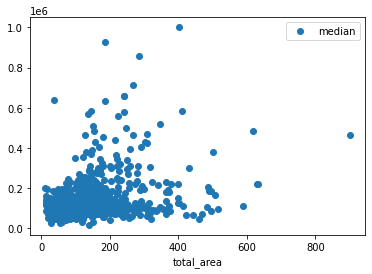

In [41]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

In [42]:
pivot_table_total_area.sort_values('median', ascending = False)

,mean,count,median
total_area,,,
401.00,1000748.0,1,1000748.0
187.50,927302.0,2,927302.0
285.70,857542.0,1,857542.0
268.00,712201.0,1,712201.0
242.40,660000.0,1,660000.0
...,...,...,...
60.96,30347.0,1,30347.0
151.80,28919.0,1,28919.0
28.66,24075.0,1,24075.0


In [43]:
data['total_area'].corr(data['price_per_square_meter'])

0.3019601438779257

Вывод: видим, что зависимость очень слабая - согласно корреляции Пирсона - 0.3! 
То есть, чем больше площадь тем немного выше стоимость!

Изучим зависимость цены квадратного метра от числа комнат.

<AxesSubplot:xlabel='rooms'>

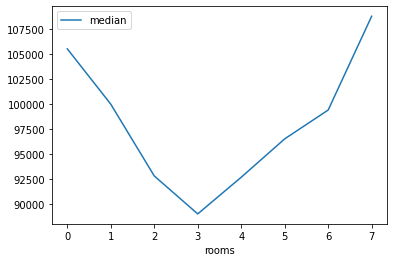

In [44]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')

In [45]:
pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

,mean,count,median
rooms,,,
7,163569.491525,59,108827.0
0,108512.730964,197,105555.0
1,100817.830993,8047,100000.0
6,140718.342857,105,99411.0
5,126749.889571,326,96516.5
2,95489.207557,7940,92796.0
4,110331.160169,1180,92666.0
3,97150.694358,5814,88983.0


In [46]:
data['rooms'].corr(data['price_per_square_meter'])

0.05541949967059211

Вывод: чем ближе количество комнат к 3 тем ниже стоимость квадратного метра.

Изучим зависимость цены квадратного метра от этажа (первого или последнего).

,mean,count,median
floor_category,,,
другой,103467.774233,17363,98275
первый,81983.111759,2917,81223
последний,93410.267686,3336,87777


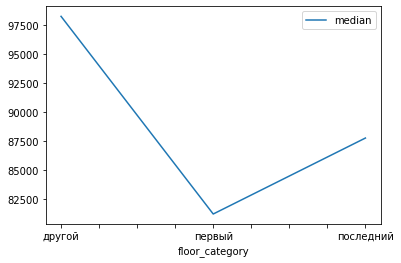

In [47]:
pivot_table_floor_category = data.pivot_table(index = 'floor_category', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category

Вывод: из графика ничего не понятно! 
Согласно медиане - как правило квартиры на первом этаже дешевле квартир на последнем этаже - в среднем на 10%!

Изучим зависимость цены квадратного метра от удалённости от центра.

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='price_per_square_meter'>

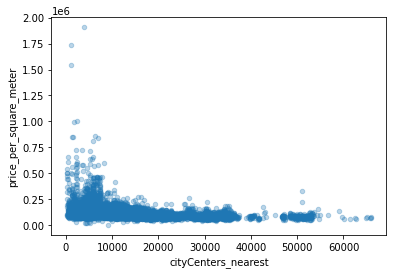

In [48]:
data.plot(kind = 'scatter', y = 'price_per_square_meter', x = 'cityCenters_nearest', alpha = 0.3)

In [49]:
data['cityCenters_nearest'].corr(data['price_per_square_meter'])

-0.31795073682864694

Вывод: видим явную зависимость стоимости квадратного метра от близости к центру! Чем ближе к центру, тем выше стоимость!

Изучим зависимость цены квадратного метра от даты размещения: дня недели.

<AxesSubplot:xlabel='weekday_exposition'>

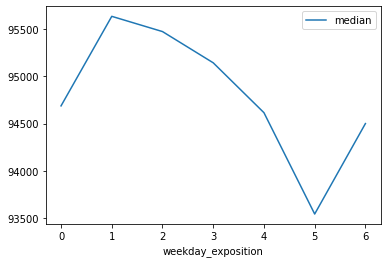

In [50]:
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

In [51]:
pivot_table_weekday_exposition.sort_values('median', ascending = False)

,mean,count,median
weekday_exposition,,,
1,99734.089410,4183,95634.0
2,99616.731002,3974,95473.0
3,100162.466356,4295,95143.0
0,99437.994463,3612,94688.0
4,99011.697000,4000,94616.0
6,97707.917010,1699,94501.0
5,99017.722107,1936,93545.5


Вывод: видим, что чем ближе ко вторнику выставлены объявления тем в среднем выше стоимость, но незначительно! 
По субботам стоимость самая низкая!

Полагаю, что стоимость выставленной на продажу недвижимости зависит от общей активности людей, так как именно в 
рабочие дни мы видим более высокие цены.

<AxesSubplot:xlabel='month_exposition'>

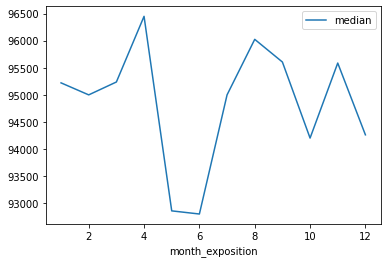

In [52]:
pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

In [53]:
pivot_table_month_exposition.sort_values('median', ascending = False)

,mean,count,median
month_exposition,,,
4,101948.567045,2379,96451
8,100110.094037,1744,96026
9,100463.814740,1981,95607
11,99230.427246,2371,95588
3,98972.768844,2587,95238
1,99862.139333,1500,95222
2,98768.292045,2640,95000
7,99625.190560,1695,95000
12,99574.280926,1641,94262


видим огромное снижение цены ближе к лету. Цены все ежемесечно разные

<AxesSubplot:xlabel='year_exposition'>

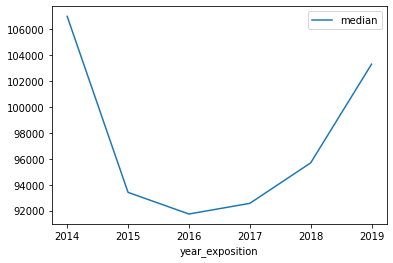

In [54]:
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

In [55]:
pivot_table_year_exposition.sort_values('median', ascending = False)

,mean,count,median
year_exposition,,,
2014,124830.000000,137,107000.0
2019,107123.332060,2879,103305.0
2018,97773.107290,8519,95689.0
2015,104613.756507,1191,93414.0
2017,97621.434188,8190,92564.5
2016,98321.900467,2783,91743.0


до 16 года было очень плавное падение цены, в этот критический год начался не менее плавный подъём

In [56]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table

,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231
посёлок Мурино,522,85751.733716
посёлок Шушары,440,78676.904545
Всеволожск,398,68654.007538
Пушкин,369,103125.373984
Колпино,338,75424.150888
посёлок Парголово,327,90175.489297
Гатчина,307,68745.693811
деревня Кудрово,299,92473.086957


In [57]:
#самая высокая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231


In [58]:
#самая низкая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
Выборг,237,58141.489451


Ранее вы посчитали расстояние до центра в километрах. 
Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену 
каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

,price_per_square_meter
cityCenters_nearest_km,
0,187323.674419
1,166603.312500
2,146662.420195
3,129415.891635
4,137475.039691
5,146978.789337
6,152277.455319
7,141399.287469
8,120580.929851


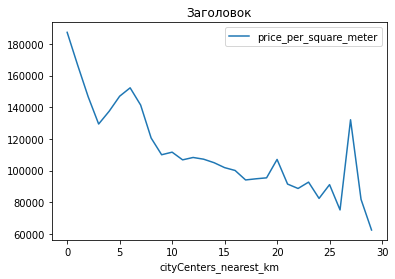

In [59]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(999999)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=999999').pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_square_meter', aggfunc = 'mean')
pivot_table_km.plot(title = 'Заголовок')
pivot_table_km

судя по графику центром считать будем радиус в 3 километра

### Общий вывод

Был предоставлен датасет с информацией о продаже квартир. Были заполнены пропуски в данных: высота потолков (по среднему значению), жилая площадь (в зависимости от количества комнат), площадь кухни (по среднему отношению к площади квартиры). Был заменен тип object у количества дней размещений, названия населенного пункта и апартаментах для удобства дальнейшей работы
В датасет были добавлены новые столбцы с ценой квадратного метра, категоризацией этажа квартиры, днем недели, месяцем, годом публикаци объявления и соотношением жилой площади и кухни к общей площади квартиры.
По всей выборке до среза выбивающихся значений наиболее часто встречаются 1 и 2-х комнатные квартиры. Наиболее частые размеры 35-45 кв. метров. Имеется пик стоимости в районе 4 миллионов рублей. Наиболее часто встречающаяся высота потолков 2.45-3 метра. Больше всего квартир было продано через 1.5 месяца после выставления объявления.
Были отрезаны выбивающиеся значения, например, высота потолков меньше 2 метров, площадь кухни меньше 8 метров и т д.
Исследование диаграмм рассеивание показало прямую зависимость между ценой продажи и размером квартиры. Разброс цены увеличивается при увеличении числа комнат. Зависимости цены квартиры от расстояния до центра не такая явная, как для площади квартиры, но для квартир в самом центре города разброс цены в большую сторону значительно выше. Явной зависимотси между ценой продажи и днем недели выставления объявления нет. Зависимости от месяца так же нет, хотя разброс цен в апреле и мае несколько выше. В 2015 и 2016 году цена продажи была в среднем ниже, чем в 2017 году. В 2017 году разброс цен выше. Но нельзя утверждать, что со временем цена квартир увеличивается. Цены квартир на 1-ом этаже ниже, чем на других.
Среди городов с наибольшим числом объявлений , самые дорогие цены за квадратный метр квартиры в Санкт-Петербурге, Пушкине и Сестрорецке, а вамые низкие цены в Красном Селе, Ломоносове и Кронштаде.
Цена за квадратный метр квартиры в Питере начинает резко падатьот 10 км от центра, можно принять эту зону за центр города. При этом на 27 метрах имеется скачок цен.
Средняя стоимость квартиры в центре Питера примерно на 2.1М руб. выше, чем средняя по городу. Выше и общая площадь квартиры на 14 кв. метров. Цена одного квадратого метро отличается примерно на 10к. В центре в среднем 3-х комнатные квартиры против 2-х комнатных в среднем по городу. Высота потолков немного выше (10 см). Соотношение квартир на разных этажах примерно одинаковое. Соотношния объявлений по дням недели, месяцам и годам примерно одинаковое, тенденции похожи. Графики рассеивания схожи для квартир по всему городу и в центре.